AVCAD - Exercise 7

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [12]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,Pluvial,Permanent,80,Siliceous,17.700,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,Pluvial,Permanent,150,Siliceous,0.010,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,Pluvial,Permanent,140,Siliceous,3.059,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,Pluvial,Permanent,450,Siliceous,62.100,...,0,0,0,0,0,0,0,0,0,0


Using the dataset in EFIplus_medit.zip:
1. Check the if any of the continuous environmental variables in the EFIplus_medit dataset (Altitude,
Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul) would
require a data transformation in order to apply parametric tests.

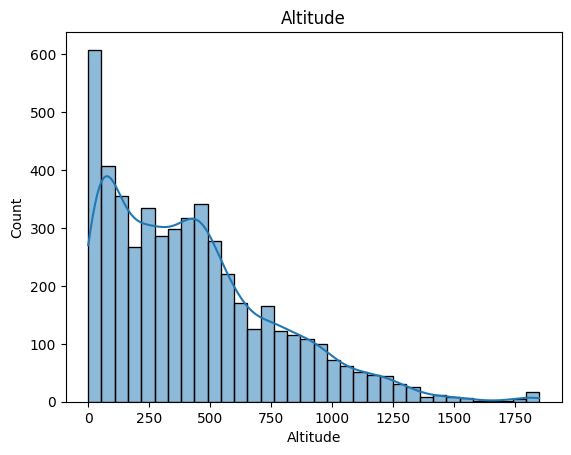

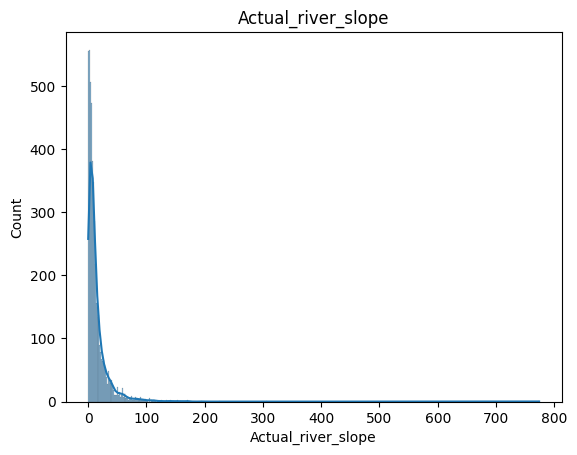

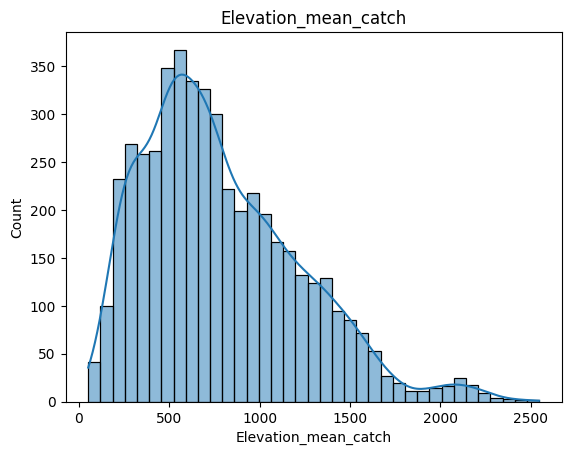

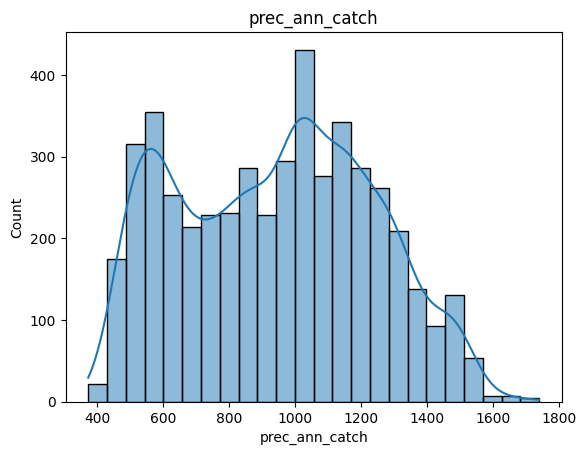

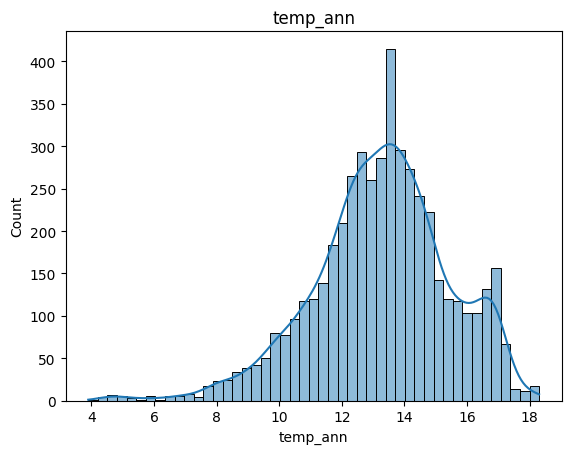

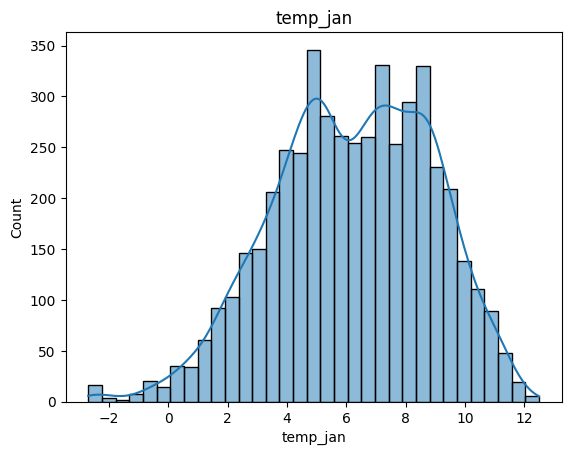

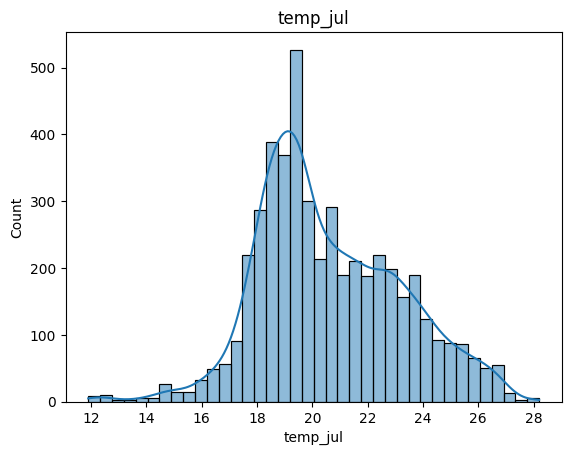

In [13]:
continuous_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
for var in continuous_variables:
    sns.histplot(df[var], kde=True)
    plt.title(var)
    plt.show()

2. Apply the appropriate data transformation and check the new distributions.

In [14]:
skewed_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch']
for var in skewed_variables:
    df[var] = np.log1p(df[var])

df.dropna(inplace=True) 

3. Create a column with the total number of species present (the species richness) in each sampling site (the first species in the dataset is ‘Abramis brama’ and all the columns to the right are all species).

Note: We're not completely sure about this part...

In [15]:
# 3. Create a column for species richness
df['Species_richness'] = df.iloc[:, 7:].notnull().sum(axis=1)

In [16]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 'Water_quality_index',
 'Eutrophication',
 'Organic_pollution',
 'Organic_siltation',
 'Total_fish_individuals',
 'Total_sp',
 'Abramis brama',
 'Achondrosto

In [17]:
df.columns.get_loc('Abramis brama')

46

In [18]:
df.columns.get_loc('Iberochondrostoma_sp')

153

In [19]:
df['Species_Richness'] = df.iloc[:, 46:154].sum(axis=1)
df['Species_Richness']

18      6
19      6
28      7
32      8
43      7
       ..
5006    5
5007    7
5008    6
5009    1
5010    6
Name: Species_Richness, Length: 2822, dtype: int64

4. Check the existence of bivariate outliers in the relationship between Mean Annual Temperature
(‘temp_ann’) and species richness using an appropriate plot. Run a bivariate isolation forest to detect
outliers and plot the result.

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
df2 = df.dropna()

In [22]:
# Bivariate isolation forest

model = IsolationForest(n_estimators = 150, contamination='auto', max_features=2) # define the model (150 isolation trees, default: only 1 variable (feature) of the dataset)
model.fit(df2[['temp_ann', 'Species_Richness']].values) # fit the model 
scores = model.decision_function(df2[['temp_ann', 'Species_Richness']].values) #  extract the anomaly scores (mean anomaly scores of each tree)
anomaly = model.predict(df2[['temp_ann', 'Species_Richness']].values) # extract an anomaly (outlier) identifier (-1)
df2['scores'] = scores # add a new column to the database with the anomaly scores
df2['anomaly'] = anomaly # add a new column to the database with the anomaly identifier (1/-1)
pd.crosstab(df2['anomaly'], columns='count') # count the number of outliers

col_0,count
anomaly,
-1,785
1,2037


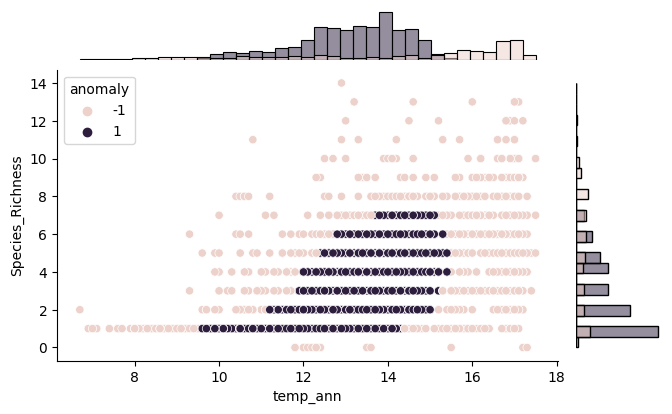

In [23]:
g = sns.JointGrid(data=df2, x='temp_ann', y='Species_Richness', hue='anomaly') 
g.plot(sns.scatterplot, sns.histplot) # to plot both a scatter plot and a boxplot for each variable
g.ax_marg_x.set_axis_off() # removes the marginal x-axis
g.ax_marg_y.set_axis_off() # removes the marginal y-axis
g.fig.set_figwidth(7) # to define the width to get a non-square figure with JointGrid 
g.fig.set_figheight(4) # to define the height to get a non-square figure with JointGrid 
plt.show()